**Problem Statement**


**A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.**

**The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.**


**The company wants to know:**

**Which variables are significant in predicting the price of a house, and**

**How well those variables describe the price of a house.**

**Also, determine the optimal value of lambda for ridge and lasso regression.**

In [1035]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

**Step 1: Read and Understand the Data**

In [1036]:
# reading the dataset
data = pd.read_csv("/Users/hmeghwan/Downloads/train.csv")

In [1037]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1038]:
#Finding the sum of null values in all columns 
pd.set_option('display.max_rows', None, 'display.max_columns', None)
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [1039]:
#deleting columns having NaN values more than 20%
per=int(((100-20)/100)*data.shape[0]+1)
data = data.dropna(axis=1, thresh=per)
data.shape

(1460, 76)

In [1040]:
data.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageFinish      81
GarageType        81
GarageCond        81
GarageQual        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
RoofStyle          0
RoofMatl           0
SalePrice          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BldgType           0
OverallCond        0
OverallQual        0
HouseStyle         0
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
LotConfig          0
Utilities          0
LandContour        0
LotShape           0
Street             0
LotArea            0
MSZoning           0
MSSubClass         0
BsmtFinSF1         0
TotalBsmtSF        0
BsmtFinSF2         0
EnclosedPorch      0
Fireplaces         0
GarageCars         0
GarageArea         0
PavedDrive   

In [1041]:
null_columns = ['LotFrontage','GarageFinish','GarageType', 'GarageCond', 'GarageQual','GarageYrBlt','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','MasVnrArea','Electrical']

for i in null_columns:
    print(data[i].describe())
        

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
count     1423
unique       6


In [1042]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Step 2: Impute null values with meaningful data**

In [1043]:
#Replacing categorical variable's NA value with the value given in data dictionary
data['BsmtQual'] = data['BsmtQual'].fillna("No Basement")
data['BsmtCond'] = data['BsmtCond'].fillna("No Basement")
data['BsmtExposure'] = data['BsmtExposure'].fillna("No Basement")
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("No Basement")
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("No Basement")
#data['FireplaceQu'] = data['FireplaceQu'].fillna("No Fireplace")
data['GarageType'] = data['GarageType'].fillna("No Garage")
data['GarageFinish'] = data['GarageFinish'].fillna("No Garage")
data['GarageQual'] = data['GarageQual'].fillna("No Garage")
data['GarageCond'] = data['GarageCond'].fillna("No Garage")
data['Electrical'] = data['Electrical'].fillna("SBrkr")
data['MasVnrType'] = data['MasVnrType'].fillna("None")
    

In [1044]:
#replacing null values of numerical data woth median because data is skewed
numerical_null =['LotFrontage','GarageYrBlt','MasVnrArea']
for i in numerical_null:
    data[i] = data[i].fillna(data[i].median())
data[numerical_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   GarageYrBlt  1460 non-null   float64
 2   MasVnrArea   1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [1045]:
#separate columns of categorical and numerical
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_categorical = data.select_dtypes(include=['object'])


In [1046]:
#derived variable
data['houseAge'] = data['YrSold'] - data['YearBuilt']

## Drop the two columns from which we created new one
data.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

**Drop column with high correlation based on correlation matrix**

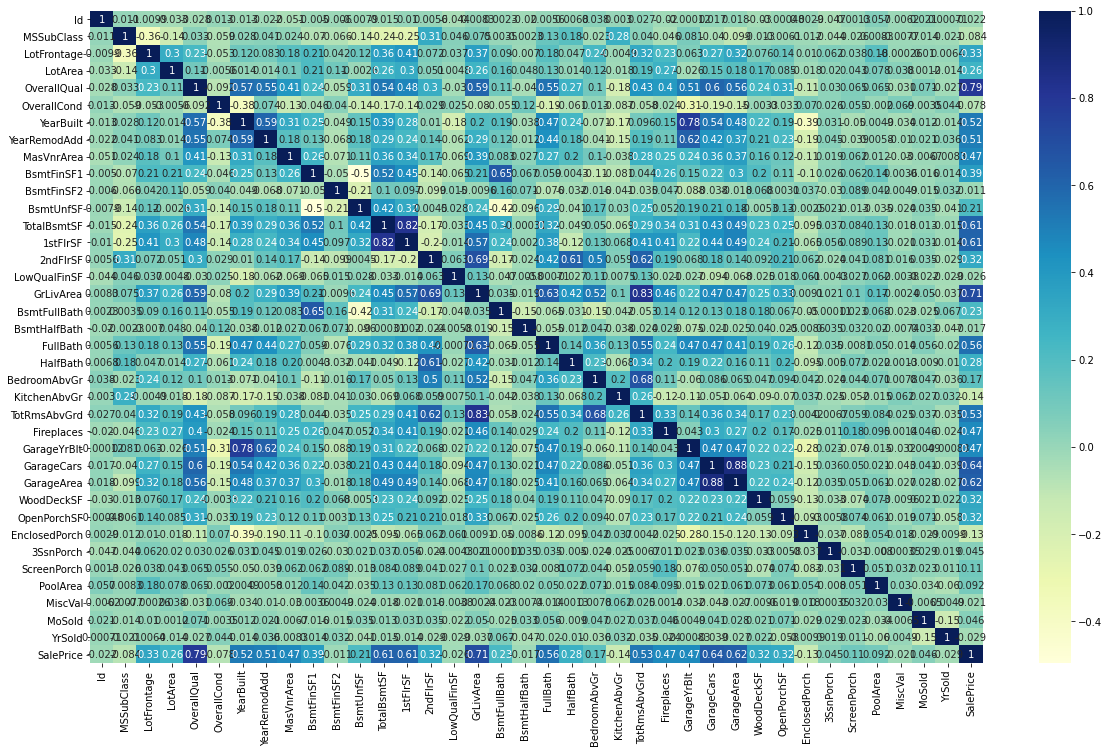

In [1047]:
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [1048]:
corrMatrix=data_numeric.corr().abs()
upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.80
corrFeatures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.80)]
#dropping highly correlated columns because they bring the same information
data.drop(columns=corrFeatures,inplace = True, axis=1)
data.shape

(1460, 72)

In [1049]:
#column Id is unique to every row, hence does not add any significance
data = data.drop('Id', axis=1)

In [1050]:
#Log transformation of target variable
data['SalePrice'] = np.log(data['SalePrice']) 

In [1051]:
data_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


**Data Encoding**

In [1052]:
# convert into dummies - one hot encoding
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,

In [1053]:
# drop categorical variables 
data = data.drop(list(data_categorical.columns), axis=1)
# concat dummy variables with data
data = pd.concat([data, data_dummies], axis=1)

In [1054]:
data.isnull().any()

MSSubClass                  False
LotFrontage                 False
LotArea                     False
OverallQual                 False
OverallCond                 False
YearRemodAdd                False
MasVnrArea                  False
BsmtFinSF1                  False
BsmtFinSF2                  False
BsmtUnfSF                   False
TotalBsmtSF                 False
2ndFlrSF                    False
LowQualFinSF                False
GrLivArea                   False
BsmtFullBath                False
BsmtHalfBath                False
FullBath                    False
HalfBath                    False
BedroomAbvGr                False
KitchenAbvGr                False
Fireplaces                  False
GarageYrBlt                 False
GarageCars                  False
WoodDeckSF                  False
OpenPorchSF                 False
EnclosedPorch               False
3SsnPorch                   False
ScreenPorch                 False
PoolArea                    False
MiscVal       

**Splitting of data into train and test**

In [1055]:
# split into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

**Data Scaling : fitting scaler on train and transform on test** 

In [1056]:
scaler = MinMaxScaler()
df_train_transformed = scaler.fit_transform(df_train)
df_train_transformed = pd.DataFrame(df_train_transformed, columns = df_train.columns)

df_test_transformed = scaler.transform(df_test)
df_test_transformed = pd.DataFrame(df_test_transformed, columns = df_test.columns)

In [1057]:
#dividing into X and Y
y_train = df_train_transformed['SalePrice']
X_train = df_train_transformed.drop(['SalePrice'], axis = 1)

y_test = df_test_transformed['SalePrice']
X_test = df_test_transformed.drop(['SalePrice'], axis = 1)

**Reduce number of features using RFE**

In [1058]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 74),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 25),
 ('MasVnrArea', False, 168),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 155),
 ('LowQualFinSF', False, 59),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 31),
 ('BsmtHalfBath', False, 171),
 ('FullBath', False, 152),
 ('HalfBath', False, 160),
 ('BedroomAbvGr', False, 83),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 51),
 ('GarageYrBlt', False, 100),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 32),
 ('OpenPorchSF', False, 103),
 ('EnclosedPorch', False, 45),
 ('3SsnPorch', False, 58),
 ('ScreenPorch', False, 35),
 ('PoolArea', False, 121),
 ('MiscVal', False, 57),
 ('MoSold', False, 178),
 ('houseAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pa

In [1059]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,KitchenAbvGr,GarageCars,houseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandSlope_Sev,Condition2_PosN,Condition2_RRAe,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior2nd_AsphShn,Exterior2nd_CBlock,BsmtQual_No Basement,BsmtCond_No Basement,BsmtCond_Po,BsmtFinType1_No Basement,BsmtFinType2_No Basement,Heating_GasA,Heating_GasW,Heating_Wall,Functional_Min2,Functional_Sev,Functional_Typ,GarageQual_Gd,GarageCond_Gd,GarageCond_Po,SaleType_Con,SaleType_ConLD,SaleType_New,SaleCondition_Partial
0,0.157534,0.019306,0.444444,0.625,0.082920,0.0,0.169521,0.141408,0.081860,0.0,0.00,0.610294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.236301,0.039403,0.666667,0.500,0.174876,0.0,0.154110,0.220458,0.424289,0.0,0.75,0.117647,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.106164,0.033981,0.555556,0.375,0.016655,0.0,0.274401,0.120295,0.201576,0.0,0.25,0.477941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.130137,0.017931,0.555556,0.875,0.000000,0.0,0.207620,0.079378,0.230015,0.0,0.25,0.705882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133562,0.046139,0.333333,0.625,0.000000,0.0,0.332620,0.127169,0.355880,0.5,0.50,0.919118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Linear Regression**

In [1060]:
# Instantiate
lm2 = LinearRegression()

# Fit a line
lm2.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1061]:
# Print the coefficients and intercept
print(lm2.intercept_)
print(lm2.coef_)

-1.175785340839711
[ 0.0509146   0.22412596  0.21442122  0.1334349   0.23611669  0.03311624
  0.01768161  0.23285764  0.51430433 -0.09109138  0.07378891 -0.11872889
  0.14433431  0.13480889  0.13283402  0.11193432 -0.07411293 -0.65008767
 -0.20008439  0.17300607  1.08246593  1.23160749  1.2146444   1.07932864
  1.14827568  1.0313306   1.0902216  -0.01213028 -0.10932203 -0.01158353
 -0.01213028 -0.01158353  0.02746386  0.02746386  0.13048651  0.02746386
 -0.05868832  0.05512493  0.05219346  0.0875815   0.03225004 -0.20317327
  0.03182254  0.02586714 -0.01739154  0.03199289  0.05771791  0.04956905
  0.01506141  0.01506141]


In [1062]:
X_test_rfe = X_test[col]

In [1063]:
y_pred_train = lm2.predict(X_train_rfe)
y_pred_test = lm2.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


0.9254786911566691
0.8337218703248706
1.265498241866496
1.2679673459635943
0.0012394693847859902
0.002894902616355238


**Ridge Regularization**

In [1064]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1065]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.05}
-0.030871810336944416


In [1066]:
#Fitting Ridge model for alpha = 0.05 and printing coefficients which have been penalised
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.02158692  0.18215396  0.23076924  0.13071464  0.19376065  0.03378868
  0.0127635   0.19201394  0.48462393 -0.07816942  0.08800461 -0.11656163
  0.13790359  0.13137624  0.13199465  0.10447886 -0.03395081 -0.57232888
 -0.1437355   0.12805978  0.70544155  0.77269976  0.75866665  0.66517041
  0.75571802  0.65193054  0.71780907 -0.01056701 -0.10385354 -0.01007909
 -0.01056701 -0.01007909  0.01731372  0.01731372  0.08682889  0.01731372
 -0.04049278  0.05170126  0.0514863   0.07756301  0.02893575 -0.18151861
  0.02763337  0.02658115 -0.01774577  0.02657707  0.05762812  0.04891082
  0.01359464  0.01359464]


In [1067]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9191141178460402
0.8478084112244216
1.373579493522505
1.1605492873583623
0.001345327613636146
0.0026496559072108727


**Lasso Regularization**

In [1068]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1069]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1070]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1071]:
lasso.coef_

array([-0.        ,  0.07004112,  0.26648212,  0.12774731,  0.10941782,
        0.02523414, -0.        ,  0.12134874,  0.42622521, -0.042923  ,
        0.11158742, -0.11537264,  0.07045425,  0.06306146,  0.07546241,
        0.03638606,  0.04425432, -0.40708314, -0.        ,  0.        ,
        0.07880684,  0.00442411,  0.        ,  0.        ,  0.07684031,
        0.0289107 ,  0.10381548, -0.        , -0.03765029, -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.00914248,  0.0031529 ,  0.        ,  0.        ,
        0.0177326 , -0.03929035,  0.01580358,  0.01285997, -0.        ,
       -0.        ,  0.0118638 ,  0.01741889,  0.01990121,  0.        ])

In [1072]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8745611215864693
0.8605811857436673
2.1301649495684423
1.0631494606980454
0.002086351566668406
0.0024272818737398295


**Comparing the metrics**

In [1073]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.925479,0.919114,0.874561
1,R2 Score (Test),0.833722,0.847808,0.860581
2,RSS (Train),1.265498,1.373579,2.130165
3,RSS (Test),1.267967,1.160549,1.063149
4,MSE (Train),0.035206,0.036679,0.045677
5,MSE (Test),0.053804,0.051475,0.049267


In [1074]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Linear'] = lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1075]:
betas

,Linear,Ridge,Lasso
LotFrontage,0.050915,0.021587,-0.000000
LotArea,0.224126,0.182154,0.070041
OverallQual,0.214421,0.230769,0.266482
OverallCond,0.133435,0.130715,0.127747
BsmtFinSF1,0.236117,0.193761,0.109418
BsmtFinSF2,0.033116,0.033789,0.025234
BsmtUnfSF,0.017682,0.012763,-0.000000
TotalBsmtSF,0.232858,0.192014,0.121349
GrLivArea,0.514304,0.484624,0.426225
KitchenAbvGr,-0.091091,-0.078169,-0.042923


**Subjective  Questions**


**1. Double the value of alpha for both Ridge and Lasso**

In [1076]:
#Fitting Ridge model for alpha = 0.05 *2  and printing coefficients which have been penalised
alpha = 0.05 * 2
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
print(ridge2.coef_)

[ 0.00887602  0.16047367  0.23911499  0.12934104  0.17332441  0.03397678
  0.01045661  0.17229973  0.46801207 -0.07153251  0.09503745 -0.11549286
  0.13304792  0.12784288  0.12987427  0.09916948 -0.01423037 -0.52369393
 -0.11259244  0.10345455  0.52706439  0.55630897  0.54360514  0.47099986
  0.56873173  0.47360931  0.5417855  -0.009726   -0.09959164 -0.00927401
 -0.009726   -0.00927401  0.01242259  0.01242259  0.0653709   0.01242259
 -0.03171461  0.04942076  0.05047602  0.07161365  0.02748728 -0.16625856
  0.02560562  0.02695823 -0.01774185  0.02356752  0.05697457  0.04808421
  0.01283233  0.01283233]


In [1077]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9115712201886059
0.8539227031915295
1.5016706914928728
1.1139242587203368
0.0014707842228137834
0.0025432060701377555


In [1078]:
#Fitting lasso model for alpha = 0.0001 * 2 and printing coefficients which have been penalised

alpha =0.0001 * 2

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1079]:
lasso2.coef_

array([-0.        ,  0.04722996,  0.27851784,  0.1229577 ,  0.09561369,
        0.0183182 , -0.        ,  0.10148853,  0.40554336, -0.03272244,
        0.11318598, -0.11479862,  0.03194437,  0.01915757,  0.0410592 ,
        0.        ,  0.02879579, -0.28146927, -0.        ,  0.        ,
        0.01928447,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.02566214, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.00761431, -0.        ,  0.        ,
       -0.        , -0.00467619,  0.        ,  0.        ,  0.        ,
        0.01212655, -0.        ,  0.01110416,  0.00253979, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.01702344,  0.        ])

In [1080]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train_rfe)
y_pred_test = lasso2.predict(X_test_rfe)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8622413258268851
0.8661397562143995
2.3393759808277705
1.0207621313427275
0.0022912595306834186
0.0023305071491843093


In [1081]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Linear'] = lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Ridge_twice_alpha'] = ridge2.coef_
betas['Lasso_twice_alpha'] = lasso2.coef_

In [1082]:
betas

,Linear,Ridge,Lasso,Ridge_twice_alpha,Lasso_twice_alpha
LotFrontage,0.050915,0.021587,-0.000000,0.008876,-0.000000
LotArea,0.224126,0.182154,0.070041,0.160474,0.047230
OverallQual,0.214421,0.230769,0.266482,0.239115,0.278518
OverallCond,0.133435,0.130715,0.127747,0.129341,0.122958
BsmtFinSF1,0.236117,0.193761,0.109418,0.173324,0.095614
BsmtFinSF2,0.033116,0.033789,0.025234,0.033977,0.018318
BsmtUnfSF,0.017682,0.012763,-0.000000,0.010457,-0.000000
TotalBsmtSF,0.232858,0.192014,0.121349,0.172300,0.101489
GrLivArea,0.514304,0.484624,0.426225,0.468012,0.405543
KitchenAbvGr,-0.091091,-0.078169,-0.042923,-0.071533,-0.032722


**Important features after Lasso**

In [1090]:
x = dict(zip(betas.rows, betas.Lasso))
dict(sorted(x.items(), key=lambda item: item[1]))

{'Condition2_PosN': -0.40708314255060407,
 'houseAge': -0.1153726403010157,
 'KitchenAbvGr': -0.042923002640290135,
 'Functional_Sev': -0.039290349678054365,
 'Exterior1st_BrkComm': -0.03765029348220621,
 'BsmtFinType2_No Basement': -0.009142479730784964,
 'LotFrontage': -0.0,
 'BsmtUnfSF': -0.0,
 'Condition2_RRAe': -0.0,
 'RoofStyle_Shed': 0.0,
 'RoofMatl_Metal': 0.0,
 'RoofMatl_Roll': 0.0,
 'Exterior1st_AsphShn': -0.0,
 'Exterior1st_CBlock': -0.0,
 'Exterior2nd_AsphShn': -0.0,
 'Exterior2nd_CBlock': -0.0,
 'BsmtQual_No Basement': -0.0,
 'BsmtCond_No Basement': -0.0,
 'BsmtCond_Po': 0.0,
 'BsmtFinType1_No Basement': -0.0,
 'Heating_GasW': 0.0,
 'Heating_Wall': 0.0,
 'GarageCond_Gd': -0.0,
 'GarageCond_Po': -0.0,
 'SaleCondition_Partial': 0.0,
 'Heating_GasA': 0.0031528966295987547,
 'RoofMatl_Membran': 0.004424107185124268,
 'SaleType_Con': 0.0118638006874156,
 'GarageQual_Gd': 0.012859967973598226,
 'Functional_Typ': 0.015803583108245946,
 'SaleType_ConLD': 0.01741889373847961,
 'Fun

**Variables which are significant in predicting the price of a house are - GrLivArea,  OverallQual, OverallCond, GarageCars, TotalBsmtSF, BsmtFinSF1, RoofMatl_WdShngl,RoofMatl_CompShg.**

In [1083]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg2_metric = pd.Series(metric4, name = 'Ridge twice alpha')
ls2_metric = pd.Series(metric5, name = 'Lasso twice alpha')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg2_metric, ls2_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge twice alpha,Lasso twice alpha
0,R2 Score (Train),0.925479,0.919114,0.874561,0.911571,0.862241
1,R2 Score (Test),0.833722,0.847808,0.860581,0.853923,0.866140
2,RSS (Train),1.265498,1.373579,2.130165,1.501671,2.339376
3,RSS (Test),1.267967,1.160549,1.063149,1.113924,1.020762
4,MSE (Train),0.035206,0.036679,0.045677,0.038351,0.047867
5,MSE (Test),0.053804,0.051475,0.049267,0.050430,0.048275


**Question3 : Remove 5 most important features and build lasso model again**

In [1089]:
X_train_new = X_train_rfe.drop(['GrLivArea','OverallQual','OverallCond','GarageCars','TotalBsmtSF'], axis=1)
X_train_new.columns

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'KitchenAbvGr', 'houseAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Condition2_PosN', 'Condition2_RRAe',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'BsmtQual_No Basement', 'BsmtCond_No Basement',
       'BsmtCond_Po', 'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement',
       'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Functional_Min2',
       'Functional_Sev', 'Functional_Typ', 'GarageQual_Gd', 'GarageCond_Gd',
       'GarageCond_Po', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [1092]:
#Fitting lasso model for alpha = 0.0001 after removing 5 most important features printing coefficients which have been penalised

alpha =0.0001

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_new, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1093]:
lasso_new.coef_

array([ 1.70301633e-01,  2.02831343e-01,  5.71630690e-01,  1.18485887e-01,
        2.25234685e-01, -4.87232247e-02, -2.13846768e-01,  1.60048632e-01,
        1.30288090e-01,  1.41353716e-01,  1.19238726e-01, -2.16347911e-03,
       -2.24662157e-01,  0.00000000e+00,  0.00000000e+00,  1.00936217e-01,
        1.27642588e-01,  2.33499402e-02,  0.00000000e+00,  1.02078985e-01,
        1.75413358e-01,  1.92029144e-01, -0.00000000e+00, -1.61264305e-01,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  5.68775273e-03,
        8.37307991e-18, -8.48276669e-02,  0.00000000e+00,  0.00000000e+00,
        4.23817815e-02,  7.90742273e-02,  0.00000000e+00,  2.69746662e-02,
       -0.00000000e+00,  2.36296064e-02,  1.11911414e-01, -0.00000000e+00,
        0.00000000e+00,  3.37164668e-02,  1.03376608e-02,  2.75925995e-02,
        0.00000000e+00])

In [1094]:
coeff = pd.DataFrame(index=X_train_new.columns)
coeff.rows = X_train_new.columns
coeff['lasso_new'] = lasso_new.coef_
x = dict(zip(coeff.rows, coeff.lasso_new))
dict(sorted(x.items(), key=lambda item: item[1]))

{'Condition2_PosN': -0.22466215682795196,
 'houseAge': -0.21384676836629182,
 'Exterior1st_BrkComm': -0.1612643051198314,
 'BsmtCond_Po': -0.08482766692988811,
 'KitchenAbvGr': -0.04872322467609037,
 'LandSlope_Sev': -0.0021634791142971514,
 'Condition2_RRAe': 0.0,
 'RoofStyle_Shed': 0.0,
 'RoofMatl_Roll': 0.0,
 'Exterior1st_AsphShn': -0.0,
 'Exterior1st_CBlock': -0.0,
 'Exterior2nd_AsphShn': -0.0,
 'Exterior2nd_CBlock': -0.0,
 'BsmtFinType1_No Basement': 0.0,
 'BsmtFinType2_No Basement': 0.0,
 'Heating_Wall': 0.0,
 'Functional_Sev': -0.0,
 'GarageCond_Gd': -0.0,
 'GarageCond_Po': 0.0,
 'SaleCondition_Partial': 0.0,
 'BsmtCond_No Basement': 8.37307991449651e-18,
 'BsmtQual_No Basement': 0.005687752729923423,
 'SaleType_ConLD': 0.010337660754579193,
 'RoofMatl_Metal': 0.023349940179131716,
 'Functional_Typ': 0.02362960642386048,
 'Functional_Min2': 0.026974666230192266,
 'SaleType_New': 0.027592599548105574,
 'SaleType_Con': 0.03371646681926633,
 'Heating_GasA': 0.04238178152455337,
 'H

**Variables which are significant in predicting the price after removing first 5 are - BsmtFinSF1, BsmtUnfSF,LotArea,RoofMatl_WdShngl,RoofMatl_WdShake, LotFrontage**